In [16]:
ord("p")

112

In [96]:
bin(112)

'0b1110000'

In [28]:
bin(100)

'0b1100100'

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [192]:
 #matched filter:
    
a=[1,2,42,4,13,1,1]
b=[3,13,13,4,12,4,4]
a=np.array(a)
b=np.array(b)
up=(a*b).sum()
down=(((a**2).sum())**(1/2))*((b**2).sum())**(1/2)

cosfi=up/down
key=np.arccos(cosfi)
def matchedfilter(a,b):
    a=np.array(a) 
    b=np.array(b)
    up=(a*b).sum()
    down=(((a**2).sum())**(1/2))*((b**2).sum())**(1/2)
    cosfi=up/down
    key=np.arccos(cosfi)
    return key

In [80]:
key

0.7446781675610349

In [93]:
pulse0=np.ones(10)
örnek=np.arange(0,10,1)
pulse1=np.append(np.ones(5),np.ones(5)*-1)

<StemContainer object of 3 artists>

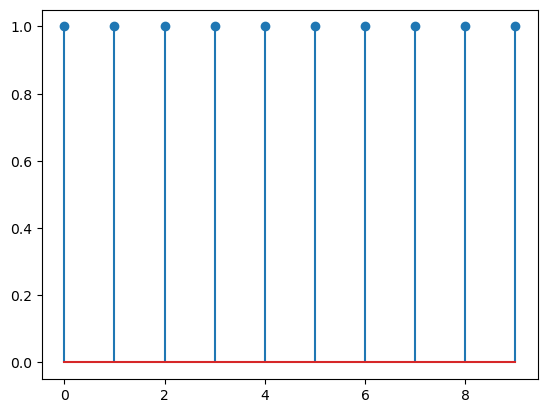

In [94]:

plt.stem(örnek,pulse0)

<StemContainer object of 3 artists>

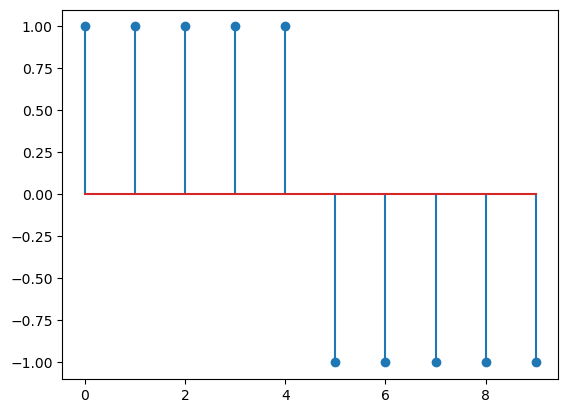

In [95]:
plt.stem(örnek,pulse1)

# creating data noisy data 

In [179]:
def addNoise(p,N):
    sig=p+0.2*np.random.randn(N)
    sig=np.round(sig,2)
    return sig

In [180]:
def createSignal(message):
    pulse0=np.ones(10)
    pulse1=np.append(np.ones(5),np.ones(5)*(-1))
    N=pulse1.size
    outSignal=np.array([])
    for letter in message:
        bitstring=bin(ord(letter))
        bitstring=bitstring[2:].zfill(8)
        for bit in bitstring:
            if bit=="0":
                outSignal=np.append(outSignal,addNoise(pulse0,N))
            else:
                
                outSignal=np.append(outSignal,addNoise(pulse1,N))
                
    return outSignal

In [301]:
message="ben kemal,geliyorum"

In [302]:
OUT=createSignal(message)
OUT.tofile("geliyor_kılıçdar.csv", sep=',', format='%.2f')

In [303]:
bin_str = "{0:b}".format(30)
bin_str = bin_str.zfill(8) # adds leading zeros to make 8 digits
print(bin_str)


00011110


In [304]:
bin_str=bin(30)

In [305]:
bin_str

'0b11110'

In [306]:
bin_str=bin_str[2:].zfill(8)

In [307]:
bin_str

'00011110'

In [308]:
import numpy as np

pulse0 = np.ones( 10 )
pulse1 = np.append( np.ones( 5 ), -1*np.ones( 5 ) )
N = pulse0.size

message = np.genfromtxt("geliyor_kılıçdar.csv", delimiter=',')
cols = message.size

In [309]:
cols

1520

In [310]:
21*80

1680

In [311]:
message[0:10]

array([0.88, 1.11, 1.3 , 1.17, 0.96, 0.97, 1.11, 1.02, 0.76, 0.83])

In [312]:

h=message[0:10]

h

array([0.88, 1.11, 1.3 , 1.17, 0.96, 0.97, 1.11, 1.02, 0.76, 0.83])

In [313]:
matchedfilter(h,pulse1)

1.499382380563152

In [314]:
i=0
bits=""
while i<cols:
    asuka=message[i:i+10]
    c1=matchedfilter(asuka,pulse1)
    c0=matchedfilter(asuka,pulse0)
    if(c1>c0):
        bits += '0'
    else :
        bits += '1'
    i += 10
        
    
    

In [315]:
bitsize=len(bits)

In [316]:
i = 0
while i < cols :
    sig = message[i:i+10]

    cos0 = abs( pulse0.dot(sig) )/( np.linalg.norm(pulse0)*np.linalg.norm(sig) )
    cos1 = abs( pulse1.dot(sig) )/( np.linalg.norm(pulse1)*np.linalg.norm(sig) )

    if cos0 > cos1 :
        bits += '0'
    else :
        bits += '1'
    i += 10

In [317]:
outstring=""
i=0
while i<bitsize:
    bitpattern=bits[i:i+8]
    asci=int(bitpattern,2)
    character=chr(asci)
    outstring+=character
    i+=8

In [318]:
outstring


'ben kemal,geliyorum'

In [319]:
chr(int(bits[24:32],2))

' '

In [320]:
int(bits[24:32])

100000

In [321]:
ord("İ")

304

In [322]:
bin(304)

'0b100110000'

In [323]:
bits

'0110001001100101011011100010000001101011011001010110110101100001011011000010110001100111011001010110110001101001011110010110111101110010011101010110110101100010011001010110111000100000011010110110010101101101011000010110110000101100011001110110010101101100011010010111100101101111011100100111010101101101'